In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("customer_booking.csv",encoding = "ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df['num_passengers'].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

In [8]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [9]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

<Axes: title={'center': 'length of stay'}, xlabel='length_of_stay'>

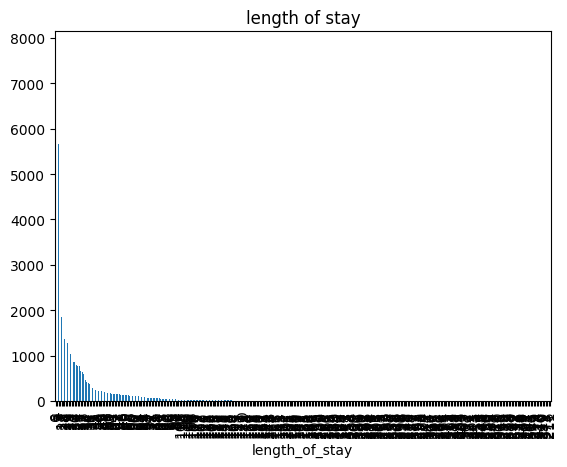

In [10]:
df['length_of_stay'].value_counts().plot(kind="bar",title="length of stay")

In [11]:
df['flight_hour'].value_counts()

flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64

In [12]:
df['flight_day'].value_counts()

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [13]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
HKTJED       1
KBRWUH       1
KTMTWU       1
AKLHGH       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [14]:
df['booking_origin'].nunique()

104

In [15]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [16]:
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['booking_complete'])
y = df['booking_complete']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify=y,random_state=2)

Cleaning dataset

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

sales_map = {"Internet":1,"Mobile":2}
trip_map = {"RoundTrip":1,"OneWay":2,"CircleTrip":3}
day_map = {"Mon":1,"Tue":2,"Wed":3,"Thu":4,"Fri":5,"Sat":6,"Sun":7}

df['sales_channel'] = df['sales_channel'].replace(sales_map)
df['trip_type'] = df['trip_type'].replace(trip_map)
df['flight_day'] = df['flight_day'].replace(day_map)

In [33]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [34]:
country_codes = {
    "Taiwan": 158,
    "Vietnam": 704,
    "South Korea": 410,
    "Macau": 446,
    "Brunei": 96,
    "Myanmar (Burma)": 104,
    "(not set)": None,
    "Russia": 643,
    "Svalbard & Jan Mayen": 744,
    "Iran": 364,
    "Laos": 418,
    "Czech Republic": 203,
    "Turkey": 792,
    "Tanzania": 834
}
def get_none_values(country_name):
    if country_name in country_codes:
        return country_codes[country_name]
    return None

In [35]:
import pycountry

def get_country_code(row):
    try:
        country = pycountry.countries.get(name = row['booking_origin'])
        return country.numeric
    except AttributeError:
        code = get_none_values(row['booking_origin'])
        if code is not None:
            return code
        return None
X_train['booking_origin'] = X_train.apply(get_country_code,axis=1)
X_test['booking_origin'] = X_test.apply(get_country_code,axis = 1)

In [36]:
X_train['booking_origin'].value_counts()

booking_origin
036    14316
458     5780
410     3607
392     3081
156     2698
       ...  
558        1
292        1
288        1
368        1
233        1
Name: count, Length: 100, dtype: int64

In [37]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
22555,1,1,1,4,77,5,2,PENPER,458,0,1,1,5.62
18984,1,1,1,59,34,11,2,MELPEN,036,1,0,1,8.83
30346,4,1,1,427,4,11,7,CTSDPS,392,1,1,1,8.67
42062,2,1,1,37,5,9,2,REPTPE,158,0,0,0,4.67
7104,1,1,1,72,30,7,3,COKSYD,036,1,1,0,8.58


In [129]:
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
14784,1,1,1,144,26,7,4,ICNTRZ,410,1,1,0,6.62
14078,1,1,1,5,24,3,1,ICNPER,643,0,0,0,6.62
28552,1,2,1,18,3,12,2,KIXTWU,458,1,1,1,7.00
30452,1,1,1,4,4,4,2,DACPER,036,1,1,0,5.62
4462,1,1,1,74,51,9,5,CGKTPE,158,0,0,0,4.67


In [38]:
import hashlib

def return_hash_code(row):
    hash_value = int(hashlib.sha256(row['route'].encode('utf-8')).hexdigest(), 16)
    return hash_value % 256
X_train['route'] = X_train.apply(return_hash_code,axis=1)
X_test['route'] = X_test.apply(return_hash_code,axis=1)

In [39]:
X_train['route'].value_counts()
X_test['route'].value_counts()

route
80     529
151    323
210    290
248    276
11     218
      ... 
143      1
175      1
229      1
171      1
126      1
Name: count, Length: 237, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,random_state=2,max_depth=10)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=2)

In [41]:
from sklearn.metrics import accuracy_score

train_pred = model.predict(X_train)
accuracy2 = accuracy_score(y_train,train_pred)
print(accuracy2)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8564
0.851


model accuracy = 85%

In [63]:
feature_importance = model.feature_importances_
features_name = X_train.columns.tolist()
features_name
feature_analysis = pd.DataFrame()
feature_analysis['feature_names'] = features_name
feature_analysis
feature_analysis['score'] = feature_importance
feature_analysis

,feature_names,score
0,num_passengers,0.027657
1,sales_channel,0.016466
2,trip_type,0.002893
3,purchase_lead,0.098225
4,length_of_stay,0.118172
5,flight_hour,0.068696
6,flight_day,0.040093
7,route,0.118979
8,booking_origin,0.324647
9,wants_extra_baggage,0.032308


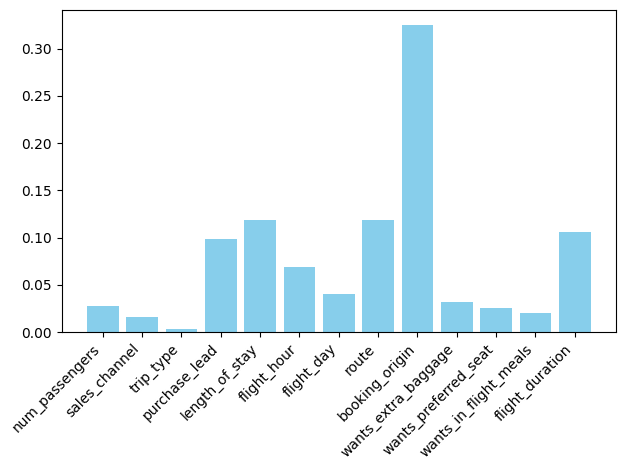

In [69]:
plt.bar(feature_analysis['feature_names'],feature_analysis['score'],color="skyblue")
plt.xlabel = "features"
plt.ylabel = "Scores"
plt.title = "feature analysis"
plt.xticks(rotation=45,ha="right")

plt.tight_layout()
plt.show()